<a href="https://colab.research.google.com/github/garima140401/Personal-Expense-Tracker-/blob/main/Personal_Expense_Tracker_Technovv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Loading dataset:
file_path = "Personal_Monthly_Expenditure.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Displaying few rows of dataset:
print("Dataset Preview:")
print(df.head())


df.columns = df.columns.str.strip()

# Replacing $ symbol as this would create problem:
expense_columns = ['Housing', 'Bills & Utilities', 'Food & Dining', 'Personal', 'Auto & Transport', 'Health & Fitness']
for col in expense_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Adding a column for Total Expenditure:
df['Total_Expenditure'] = df[expense_columns].sum(axis=1)

# Converting 'Month' to a datetime format as this format will be read only:
try:
    df['Month'] = pd.to_datetime(df['Month'], format='%b', errors='coerce')
except:
    print("Error in Month Conversion: Check the format of the Month column.")

#invalid datetime check, drop
df.dropna(subset=['Month'], inplace=True)

# Display cleaned data
print("Cleaned Dataset:")
print(df.head())


Dataset Preview:
  Month  Housing   Bills & Utilities   Food & Dining   Personal   \
0   Jan   $800.00             $210.00         $400.00    $100.00   
1   Feb   $800.00             $180.00         $350.00    $100.00   
2   Mar   $800.00             $170.00         $420.00    $100.00   
3   Apr   $800.00             $160.00         $400.00    $120.00   
4   May   $800.00             $150.00         $420.00    $100.00   

   Auto & Transport   Health & Fitness   
0            $100.00             $60.00  
1            $125.00             $70.00  
2            $120.00             $60.00  
3            $100.00             $60.00  
4            $100.00             $80.00  
Cleaned Dataset:
       Month  Housing  Bills & Utilities  Food & Dining  Personal  \
0 1900-01-01    800.0              210.0          400.0     100.0   
1 1900-02-01    800.0              180.0          350.0     100.0   
2 1900-03-01    800.0              170.0          420.0     100.0   
3 1900-04-01    800.0        

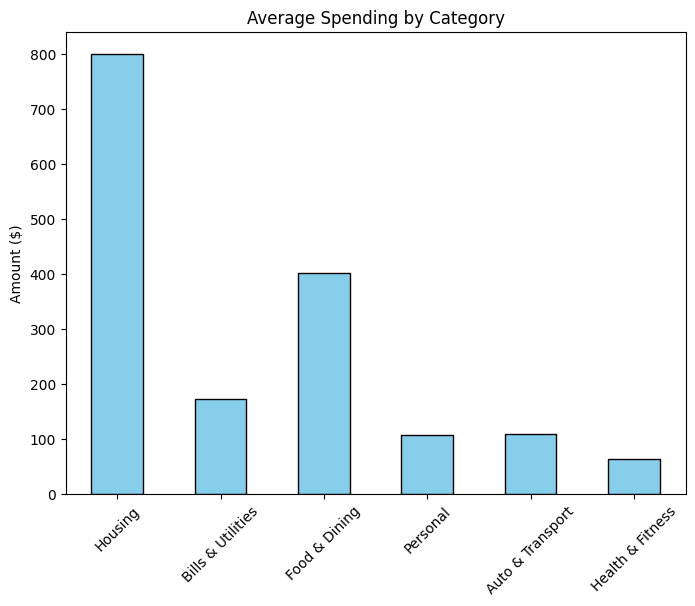

In [3]:
import matplotlib.pyplot as plt

#Exploring Category Wise:
# Average spending by category
avg_spending = df[expense_columns].mean()

# Plot
plt.figure(figsize=(8, 6))
avg_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Spending by Category")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.show()


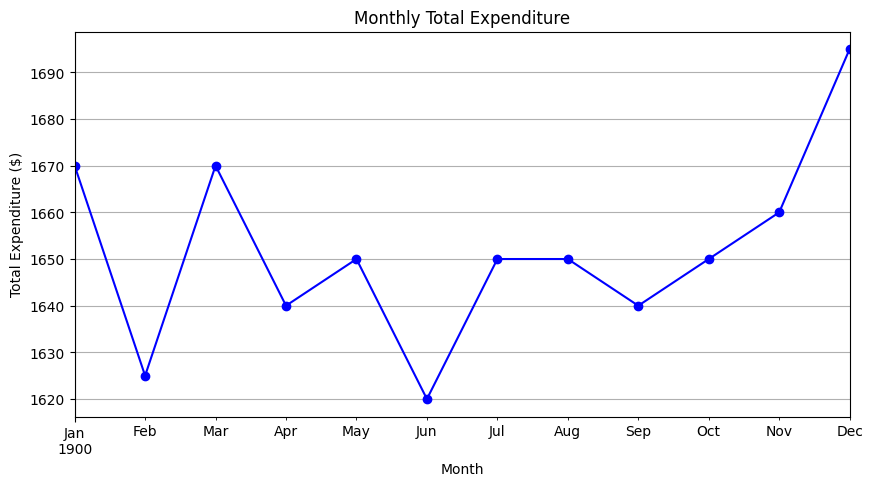

In [4]:
# Checking Month Trend
monthly_trend = df.groupby('Month')['Total_Expenditure'].sum()

# Plot
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Total Expenditure")
plt.xlabel("Month")
plt.ylabel("Total Expenditure ($)")
plt.grid()
plt.show()


In [5]:
#Creating predicting Model Using Random Forest Regressor:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preparing data for the model
X = df[expense_columns]
y = df['Total_Expenditure']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse}")

# Example prediction
future_expenses = [[800, 200, 300, 150, 120, 70]]  # Example input for each category
predicted_expenditure = model.predict(future_expenses)
print(f"Predicted Total Expenditure: ${predicted_expenditure[0]:.2f}")


Model RMSE: 7.343137385795434
Predicted Total Expenditure: $1650.40


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [6]:
import joblib

# Save the trained model
joblib.dump(model, 'expense_model.pkl')

# Saving the cleaned dataset
df.to_csv('cleaned_personal_expenses.csv', index=False)

print("Model and dataset saved successfully!")


Model and dataset saved successfully!


In [ ]:
#cd "C:\Users\Ravikant Sharma\Desktop\Full fledged Personal Expense Tracker\frontend\expense-tracker-frontend"